In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path setup

path=r"C:\Users\ranji\Downloads\Submitted tasks\Python_5\Instacart\Instacart-Basket-Analysis"

In [3]:
#Importing dataset

df=pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', "customer_ords_prods_merged.pkl"))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [5]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'First Name', 'Surnam', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [8]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Surnam,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2078084
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                28171
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
average_price                   0
spending_flag                   0
median_prior_orders             0
order_frequency_flag            0
First Name                      0
Surnam                          0
Gender                          0
State                           0
Age                             0
date_joined   

Step - 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [10]:
#Excluding the columns "first_name" and "last_name" from the dataset to address privacy concerns regarding personally identifiable information (PII)

df = df.drop(columns=['First Name', 'Surnam'])

In [12]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


Step - 3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [13]:
#Dividing the states into Regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

df.loc[df['State'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['State'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['State'].isin(South), 'region'] = 'South'
df.loc[df['State'].isin(West), 'region'] = 'West'

In [14]:
df['region'].value_counts(dropna=False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [15]:
#create cross tab for region and spend 

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna=False)

In [16]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29523,7574287
Northeast,18755,5709592
South,41316,10760294
West,31756,8268689


Across all regions, the spending habits of Instacart shoppers are consistent, with 98% classified as low spenders and the remaining 2% identified as high spenders. Consequently, there is a lack of discernible disparity in spending patterns among the various regions in the United States.

step - 4 Create an exclusion flag for low-activity customers and 
exclude them from the data. Make sure you export this sample

In [17]:
#Excluding low activity customers

df_drop = df[df['max_order']>=5]

In [18]:
df_drop.shape

(30992664, 32)

step - 5 Customer Profiles

In [19]:
#Import dept_id csv

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [20]:
df_dept.shape

(21, 2)

In [21]:
#Rename unnamed column to department_id

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [22]:
df_merged = pd.concat([df_drop, df_dept.set_index('department_id')], axis=1)

In [24]:
df_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,frozen
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,other
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,bakery
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,produce


In [25]:
df_merged.shape

(30992664, 33)

In [26]:
df_merged['max_order'].describe()

count    3.099266e+07
mean     3.442563e+01
std      2.489426e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [27]:
#Evaluate the summary statistics for the age variable.

df_merged['Age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [28]:
#Generate age_group categories.

df_merged.loc[(df_merged['Age'] < 35), 'Age_group'] = 'Young Adult'
df_merged.loc[(df_merged['Age'] >= 35) & (df_merged['Age'] < 65), 'Age_group'] = 'Middle-Aged'
df_merged.loc[df_merged['Age'] >= 65, 'Age_group'] = 'Senior'

In [29]:
df_merged.shape

(30992664, 34)

In [30]:
df_merged['Age_group'].value_counts()

Middle-Aged    14540121
Young Adult     8249797
Senior          8202746
Name: Age_group, dtype: int64

In [31]:
#Income profile (descriptive stat)

df_merged['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

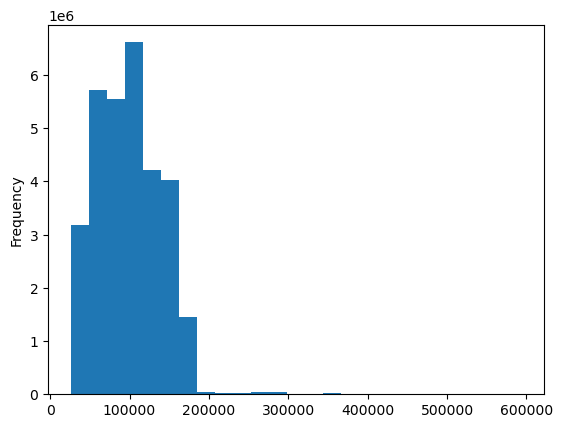

In [32]:
hist_cust_income = df_merged['income'].plot.hist(bins = 25)

In terms of income distribution, the range spans from 25,000 USD to 593,000 USD. On average, customers have an income of 99,000 USD, and the majority of customers fall within the 25,000 USD to 175,000 USD range

Based on their income, customers can be categorized as follows:

Up to 75,000 USD: Classified as >75k Between 75,000 USD and 125,000 USD: Classified as 75k - 125k Above 125,000 USD: Classified as 125k - 593k


In [33]:
# Create income_group classification\n",
    
df_merged.loc[(df_merged['income'] < 75000), 'income_group'] = '025-75k'
df_merged.loc[(df_merged['income'] >= 75000) & (df_merged['income'] < 125000), 'income_group'] = '075-125k'
df_merged.loc[(df_merged['income'] >= 125000), 'income_group'] = '125k+'

In [34]:
#Check the 'income_group' counts

df_merged['income_group'].value_counts(dropna = False)

075-125k    12791163
025-75k      9916284
125k+        8285217
Name: income_group, dtype: int64

In [35]:
df_merged.shape

(30992664, 35)

In [36]:
# Family/dependants profile

df_merged['n_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [37]:
#Crosstab between number_dependants and family_status\n",

family_crosstab = pd.crosstab(df_merged['fam_status'], df_merged['n_dependants'], dropna = False)
family_crosstab

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2647761,0,0,0
living with parents and siblings,0,508439,485157,489015
married,0,7217542,7255042,7290437
single,5099271,0,0,0


After examining the family crosstab, it is evident that there are no single, divorced, or widowed adults who have dependants. The classification of family status is determined by the number of dependants.

No dependants: Individuals without any dependants. Has dependants: Individuals with one or more dependants


In [38]:
#Create family_status profile\n",

df_merged.loc[(df_merged['n_dependants'] == 0), 'dependants'] = 'No dependants'
df_merged.loc[(df_merged['n_dependants'] >= 1), 'dependants'] = 'Has dependants'

In [39]:
#Check  'dependants' counts

df_merged['dependants'].value_counts(dropna = False)

Has dependants    23245632
No dependants      7747032
Name: dependants, dtype: int64

In [40]:
df_merged.shape

(30992664, 36)

In [41]:
#Generate a profile of dietary preferences.

diet_crosstab = pd.crosstab(df_merged['department_id'], df_merged['user_id'], dropna = False)

In [42]:
diet_crosstab

user_id,1,2,3,4,7,10,11,12,13,14,...,206198,206199,206200,206201,206202,206203,206206,206207,206208,206209
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,17,6,3,4,1,2,2,0,35,...,0,20,21,18,25,14,76,21,26,2
2,0,0,0,0,0,0,1,0,0,6,...,0,0,0,0,0,0,1,0,0,0
3,0,2,0,2,5,0,4,2,14,14,...,0,12,1,38,17,3,2,3,62,9
4,5,36,38,2,57,72,11,24,17,32,...,10,28,135,33,48,36,34,50,197,19
5,0,0,0,2,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
6,0,3,0,0,0,1,1,0,1,3,...,3,2,0,2,10,0,4,1,3,1
7,13,9,3,3,51,0,19,3,2,2,...,1,26,24,83,28,19,33,20,20,10
8,0,0,0,0,1,0,0,12,0,0,...,0,0,0,12,0,0,0,0,0,0
9,0,0,4,0,0,0,0,2,3,9,...,6,9,1,24,0,0,1,8,17,3


In [43]:
diet_dict = {}

for user, diet_counts in diet_crosstab.items():
    working_list = diet_counts.tolist()
    if working_list[11] == 0 and working_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif working_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-eater'

In [44]:
diet_list = [diet_dict[user] for user in df_merged['user_id']]


In [45]:
#Assigning user flags to the list

diet_list = [diet_dict[user] for user in df_merged['user_id']]


In [46]:
#Adding 'diet_style' column to df_drop_customers
    
df_merged['diet_style'] = diet_list    

In [47]:
df_merged.shape

(30992664, 37)

In [48]:
df_merged['diet_style'].value_counts()

Meat-eater    23085826
Vegetarian     7597108
Vegan           309730
Name: diet_style, dtype: int64

In [49]:
df_merged['diet_style'].value_counts()

Meat-eater    23085826
Vegetarian     7597108
Vegan           309730
Name: diet_style, dtype: int64

In [50]:
df_merged['max_order'].describe()

count    3.099266e+07
mean     3.442563e+01
std      2.489426e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [51]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Ords_prods_profiles.pkl'))

#5 Profile Visuals

In [ ]:
# create abbreviated profile dataframe

In [52]:
df_profile = df_merged[['user_id', 'Age', 'Age_group', 'income', 'dependants', 'department', 'diet_style', 'region', 'loyalty_flag', 'spending_flag', 'average_price', 'order_frequency_flag', 'reordered', 'fam_status']]

In [53]:
# no duplicate user_ids

df_customer = df_profile.drop_duplicates(subset=['user_id'])


In [54]:
df_customer.shape

(162633, 14)

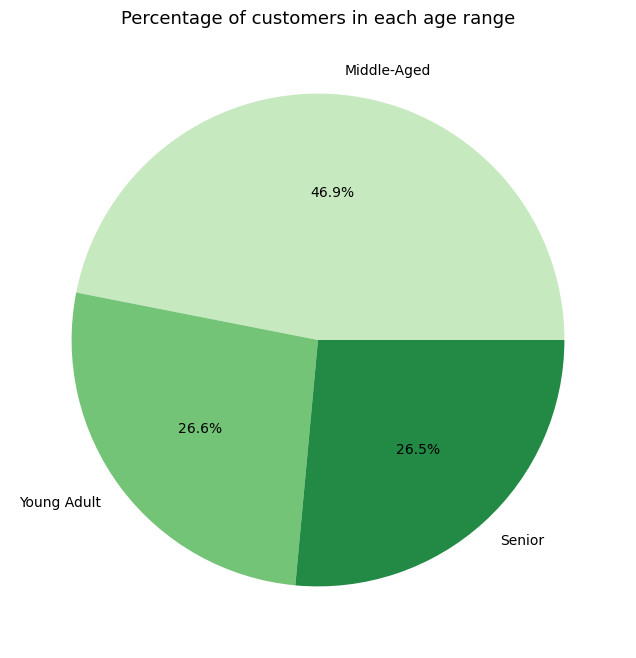

In [55]:
# Age Flag Visualization

pie_user_age = df_profile['Age_group'].value_counts().plot.pie(figsize=(8, 8),
                                                              colors=sns.color_palette('Greens', 3),
                                                              autopct='%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers in each age range', fontsize=13)
plt.show()

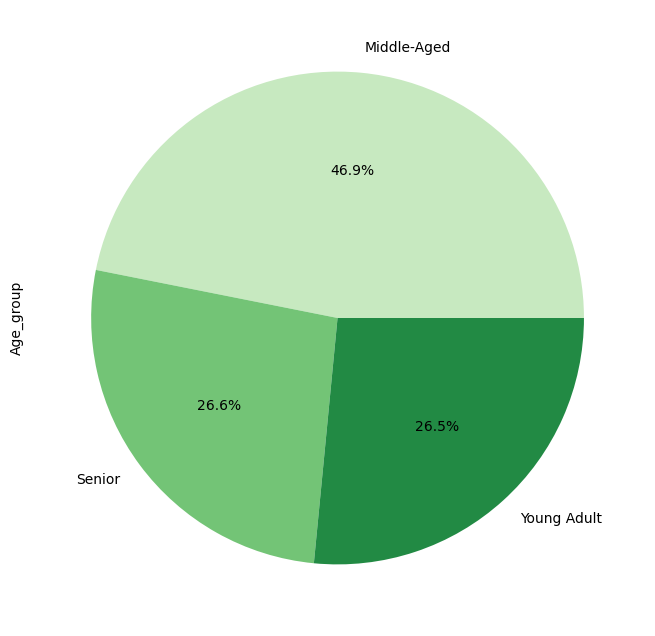

In [56]:
pie_user_age = df_customer['Age_group'].value_counts().plot.pie(figsize=(8, 8),
                                                               colors=sns.color_palette('Greens', 3),
                                                               autopct='%1.1f%%')

In [57]:
#Create viz_path

viz_path = r'C:\Users\ranji\Downloads\Submitted tasks\Python_5\Instacart\Instacart-Basket-Analysis\04 Analysis\Visualizations'


In [58]:
pie_user_age.figure.savefig(os.path.join(viz_path, 'pie_user_age'))

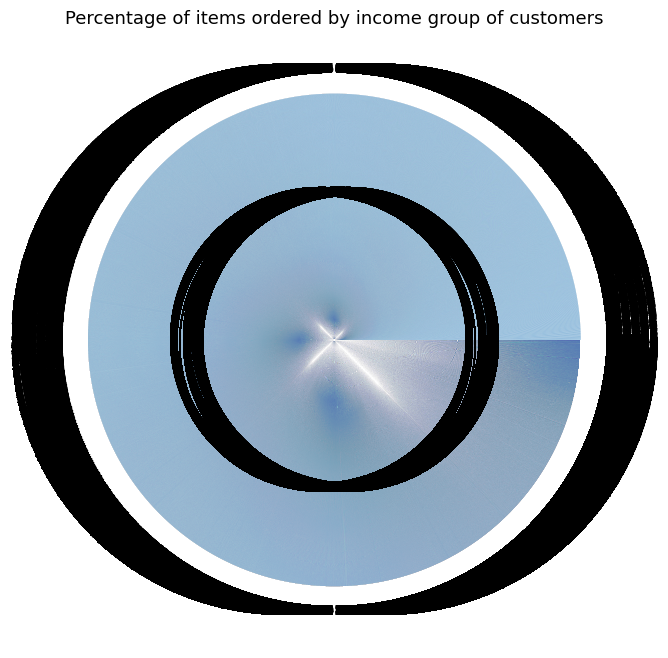

In [59]:
#Pie chart of percentage of items ordered by income group

pie_orders_income = df_profile['income'].value_counts().plot.pie(figsize=(8, 8),
                                                                      colors=sns.color_palette('Blues', 3),
                                                                      autopct='%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of customers', fontsize=13)
plt.show()